In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from csv import reader
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/Users/adrea/gdrive/Monash/BsC Chemistry Honours/Project/honours-github


In [2]:
filespath = "data/na1t-oeef-irc-full/"

filename = "na1t-efield-irc-{}"

file = filespath + "na1t-efield-irc-{}/efield_perturbation.csv".format(1)
with open(file, "r") as f:
    fieldcount = len(list(reader(f)))

nofield = []
fields = {}
vecnames = []
with open(file, "r") as f:
    vecs = list(reader(f))[2:]
    for i in vecs:
        vecnames += [(float(i[0])+float(i[1])+float(i[2]))]
for i in vecnames: 
    fields[i] =[]
    
for i in reversed(range(1, 37)):
    file = filespath + "na1t-efield-irc-{}/efield_perturbation.csv".format(i)
    with open(file, "r") as f:
        nofield += [list(reader(f))[1][4:]]
    with open(file, "r") as f:
        vecs = list(reader(f))[2:]
        for j in vecs:
            fields[(float(j[0])+float(j[1])+float(j[2]))] += [[j[3], j[4], j[5], j[6]]]

In [3]:
for i in fields.keys():
    for j in range(len(fields[i])):
        for k in range(len(fields[i][j])):
        # print(fields[i][j])
            fields[i][j][k] = float(fields[i][j][k])

In [4]:
dellist = []
for i in fields.keys():
    if len(fields[i]) != 36:
        dellist += [i]

for i in dellist:
    del fields[i]

minpathway = list(fields.keys())[0]
maxpathway = list(fields.keys())[0]
for i in fields.keys():
    if min(fields[i]) < min(fields[minpathway]):
        minpathway = i
    if max(fields[i]) > max(fields[maxpathway]):
        maxpathway = i

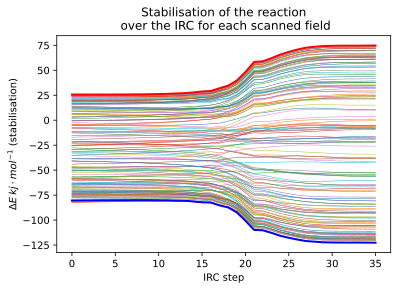

In [5]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
for i in fields.keys():
    y= []
    for j in fields[i]:
        y += [float(j[0])]
    ax.plot((list(range(len(y)))), y, linewidth=0.5)

y = []
for j in fields[minpathway]:
    y += [float(j[0])]
ax.plot((list(range(len(y)))), y, linewidth=2, color='b')

y = []
for j in fields[maxpathway]:
    y += [float(j[0])]
ax.plot((list(range(len(y)))), y, linewidth=2, color='r')

ax.set_title("Stabilisation of the reaction\n over the IRC for each scanned field")
ax.set_ylabel("$\Delta E\:kj\cdot mol^{-1}$ (stabilisation)")
ax.set_xlabel("IRC step")
plt.show()

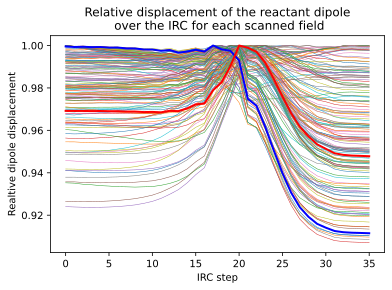

In [6]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
base = []
for i in range(len(nofield)):
    base += [np.array([float(nofield[i][0]), float(nofield[i][1]), float(nofield[i][2])])]

for i in range(len(base)):
    basevec = base[i]

for i in fields.keys():
    y = []
    count = 0
    for j in fields[i]:
        fieldvec = np.array([float(j[1]), float(j[2]), float(j[3])])
        y += [np.linalg.norm(fieldvec-base[count])]
        count += 1
    y = np.divide(y, max(y)) 
    ax.plot((list(range(len(base)))),y,  linewidth=0.5)


y = []
count = 0
for j in fields[minpathway]:
    fieldvec = np.array([float(j[1]), float(j[2]), float(j[3])])
    y += [np.linalg.norm(fieldvec-base[count])]
    count += 1
y = np.divide(y, max(y)) 
ax.plot((list(range(len(base)))), y, linewidth=2, color='b')

y = []
count = 0
for j in fields[maxpathway]:
    fieldvec = np.array([float(j[1]), float(j[2]), float(j[3])])
    y += [np.linalg.norm(fieldvec-base[count])]
    count += 1
y = np.divide(y, max(y)) 
ax.plot((list(range(len(base)))), y, linewidth=2, color='r')

ax.set_title("Relative displacement of the reactant dipole\n over the IRC for each scanned field")
ax.set_ylabel("Realtive dipole displacement")
ax.set_xlabel("IRC step")
plt.show()

In [8]:
filespath = "data/na1t-efield-irc-precise/"

filename = "na1t-efield-irc-{}"

file = filespath + "na1t-efield-irc-{}/efield_perturbation.csv".format(1)
with open(file, "r") as f:
    fieldcount = len(list(reader(f)))

nofield = []
fields = {}
fieldnames = {}
vecnames = []
with open(file, "r") as f:
    vecs = list(reader(f))[2:]
    for i in vecs:
        vecnames += [(float(i[0])+float(i[1])+float(i[2]))]

for i in vecnames: 
    fields[i] =[]
    fieldnames[i] =[]

for i in reversed(range(1, 37)):
    file = filespath + "na1t-efield-irc-{}/efield_perturbation.csv".format(i)
    with open(file, "r") as f:
        nofield += [list(reader(f))[1][4:]]
    with open(file, "r") as f:
        vecs = list(reader(f))[2:]
        for j in vecs:
            fields[(float(j[0])+float(j[1])+float(j[2]))] += [[j[3], j[4], j[5], j[6]]]
            fieldnames[(float(j[0])+float(j[1])+float(j[2]))] = [j[0], j[1], j[2]]

In [9]:
del fields[0.0]
for i in fields.keys():
    for j in range(len(fields[i])):
        for k in range(len(fields[i][j])):
        # print(fields[i][j])
            fields[i][j][k] = float(fields[i][j][k])

In [10]:
dellist = []
for i in fields.keys():
    if len(fields[i]) != 36:
        dellist += [i]

for i in dellist:
    del fields[i]

minpathway = list(fields.keys())[0]
maxpathway = list(fields.keys())[0]
for i in fields.keys():
    if min(fields[i]) < min(fields[minpathway]):
        minpathway = i
    if max(fields[i]) > max(fields[maxpathway]):
        maxpathway = i

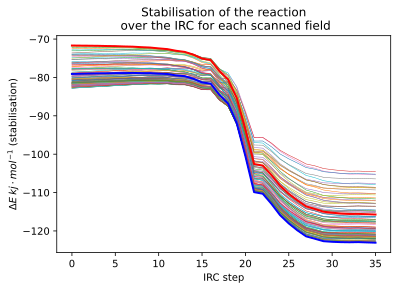

In [11]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
for i in fields.keys():
    y= []
    for j in fields[i]:
        y += [float(j[0])]
    ax.plot((list(range(len(y)))), y, linewidth=0.5)

y = []
for j in fields[minpathway]:
    y += [float(j[0])]
ax.plot((list(range(len(y)))), y, linewidth=2, color='b')

y = []
for j in fields[maxpathway]:
    y += [float(j[0])]
ax.plot((list(range(len(y)))), y, linewidth=2, color='r')

ax.set_title("Stabilisation of the reaction\n over the IRC for each scanned field")
ax.set_ylabel("$\Delta E\:kj\cdot mol^{-1}$ (stabilisation)")
ax.set_xlabel("IRC step")
plt.show()

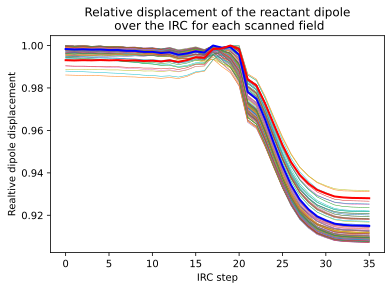

In [13]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
base = []
for i in range(len(nofield)):
    base += [np.array([float(nofield[i][0]), float(nofield[i][1]), float(nofield[i][2])])]

for i in range(len(base)):
    basevec = base[i]

for i in fields.keys():
    y = []
    count = 0
    for j in fields[i]:
        fieldvec = np.array([float(j[1]), float(j[2]), float(j[3])])
        y += [np.linalg.norm(fieldvec-base[count])]
        count += 1
    y = np.divide(y, max(y)) 
    ax.plot((list(range(len(base)))),y,  linewidth=0.5)


y = []
count = 0
for j in fields[minpathway]:
    fieldvec = np.array([float(j[1]), float(j[2]), float(j[3])])
    y += [np.linalg.norm(fieldvec-base[count])]
    count += 1
y = np.divide(y, max(y)) 
ax.plot((list(range(len(base)))), y, linewidth=2, color='b')

y = []
count = 0
for j in fields[maxpathway]:
    fieldvec = np.array([float(j[1]), float(j[2]), float(j[3])])
    y += [np.linalg.norm(fieldvec-base[count])]
    count += 1
y = np.divide(y, max(y)) 
ax.plot((list(range(len(base)))), y, linewidth=2, color='r')

ax.set_title("Relative displacement of the reactant dipole\n over the IRC for each scanned field")
ax.set_ylabel("Realtive dipole displacement")
ax.set_xlabel("IRC step")
plt.show()